In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### 导入库
**NumPy**库，它通常用于执行**线性代数**运算。
**Pandas**库，这是一个强大的**数据处理**与分析工具。它在读取和写入CSV格式数据时特别有用。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
plt.rcParams['font.family'] = 'Microsoft YaHei'


## 快速代码概要

### 基本库
- **Matplotlib**：用于绘制图表。

### 机器学习模型
- **Scikit-learn**：来自 `linear_model`、`svm`、`ensemble`、`neighbors` 和 `tree` 模块的各种分类器。
- **XGBoost**：梯度提升框架。

### 模型评估
- **Metrics**：使用 `confusion_matrix` 和 `accuracy_score` 评估模型。

In [3]:
dataset = pd.read_csv('breast cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
X = dataset.iloc[:,[3,4,6,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = dataset.iloc[:, 1].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



### 数据预处理步骤

以下代码用来展示如何进行数据预处理，包括特征缩放和数据集的分割。

```python
# 导入数据集
X = dataset.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = dataset.iloc[:, 1].values

# 将数据集拆分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# 特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


Accuracy :  0.9649122807017544


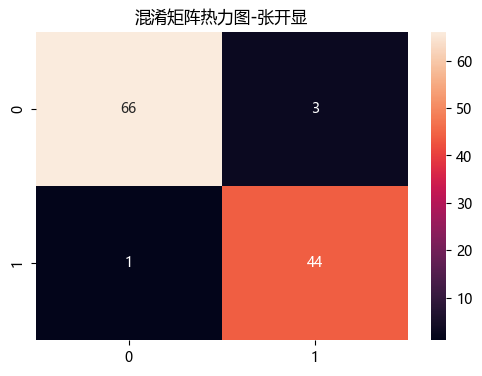

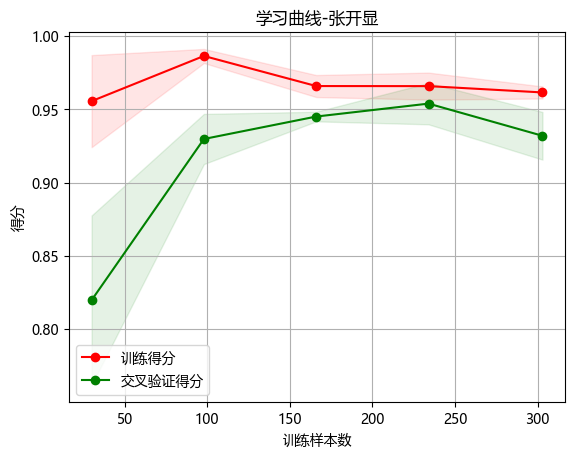

In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 定义数据集划分（这里假设你有 X_train, X_test, y_train, y_test）
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义第一层分类器参数
first_layer_classifiers = [
    ('xgbr', XGBClassifier(criterion='gini', max_depth=30, max_features='auto', min_samples_leaf=0, n_estimators=10)),
    ('dtr', DecisionTreeClassifier(random_state=40)),
    ('adbr', AdaBoostClassifier(random_state=40, n_estimators=200)),
    ('gbrt', HistGradientBoostingClassifier(random_state=40)),
    ('rf', RandomForestClassifier(random_state=40)),
]

# 定义第一层堆叠模型
final_layer = StackingClassifier(
    estimators=first_layer_classifiers,
    final_estimator=RidgeClassifier(),
    passthrough=True,
    n_jobs=-1
)

# 定义第二层分类器参数
second_layer_classifiers = [
    ('lr', RidgeClassifier()),
    ('lasso', Lasso(random_state=40)),
    ('svc', SVC(C=1, gamma=1e-6, kernel='rbf'))
]

# 定义第二层堆叠模型
multi_layer_Classifier = StackingClassifier(
    estimators=second_layer_classifiers,
    final_estimator=final_layer,
    passthrough=False,
    n_jobs=-1
)

# 训练模型
multi_layer_Classifier.fit(X_train, y_train)

# 预测并计算准确率
Y_pred = multi_layer_Classifier.predict(X_test)
accuracy = accuracy_score(Y_pred, y_test)
print("Accuracy : ", accuracy)

# 计算混淆矩阵并绘制热力图
cm = confusion_matrix(Y_pred, y_test)
plt.figure(figsize=[6, 4])
sns.heatmap(cm, annot=True)
plt.title("混淆矩阵热力图-张开显")
plt.show()

# 绘制学习曲线
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("训练样本数")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练得分")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="交叉验证得分")

    plt.legend(loc="best")
    return plt

plot_learning_curve(multi_layer_Classifier, "学习曲线-张开显", X_train, y_train, cv=3, n_jobs=-1)
plt.show()




### 多层堆叠分类器

使用`StackingClassifier`构建多层模型，结合不同算法提高预测准确性。

```python

# 定义和训练多层堆叠分类器
# 预测并计算准确率
Y_pred = multi_layer_Classifier.predict(X_test)
accuracy = accuracy_score(Y_pred, y_test)
print("Accuracy : ", accuracy)

# 绘制混淆矩阵热力图，实现可视化
cm = confusion_matrix(Y_pred, y_test)
sns.heatmap(cm, annot=True)


In [6]:
# make predictions on test datasets
from sklearn.metrics import classification_report
SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))



0.9385964912280702
              precision    recall  f1-score   support

           B       0.94      0.96      0.95        67
           M       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[64  3]
 [ 4 43]]
